<a href="https://colab.research.google.com/github/Ninja-draw-coder/PythonProjects/blob/main/M43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test Accuracy :  1.0


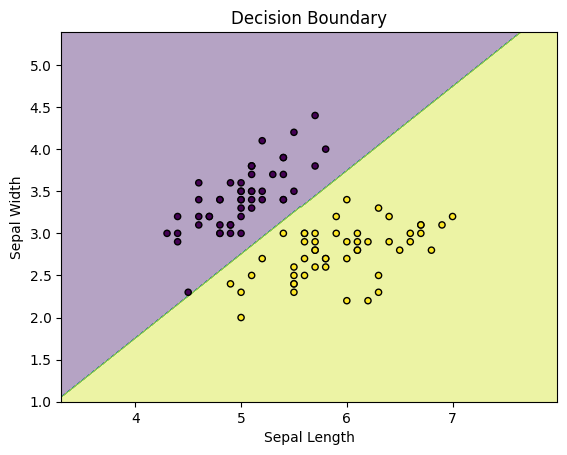

In [1]:
#Step-1 Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#Step-2 Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  #Take only sepal length and sepal width
y = iris.target  #holds class labels (0,1,2 for each flower type)

#Step-3 Use only two classes for simplicity (0: Setosa, 1: Versicolor)
X = X[y!=2]
y = y[y!=2]

#Step-4 Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Step-5 Create and train SVM model
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

#Step-6 Print accuracy
print("Test Accuracy : ",model.score(X_test,y_test))

#Step-7 Plot decision boundary
def plot_decision_boundary(model, X, y):
  h = 0.01  #step size for the mesh grid (resoltion of the plot)
  x_min , x_max = X[:,0].min()-1 ,X[:, 0].max()+1
  y_min , y_max = X[:,1].min()-1 ,X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, alpha=0.4)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
  plt.xlabel('Sepal Length')
  plt.ylabel('Sepal Width')
  plt.title('Decision Boundary')
  plt.show()

plot_decision_boundary(model, X, y)
